In [31]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("heart_disease_dataset.csv", sep=';')

In [3]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

###### 1. As a first step, use MLP with 2 hidden layers containing 6 and 4 units respectively. Do not use pytorch, keras, tensorflow or any other libraries. You should create NN from scratch.

In [4]:
class Heart_disease:
    def __init__(self, x, y):
        self.IN      = x
        #initialize weights with random values
        self.W1   = np.random.rand(self.IN.shape[1],6) 
        self.W2   = np.random.rand(6,4)  
        self.W3   = np.random.rand(4,1)
        self.y          = y
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.3

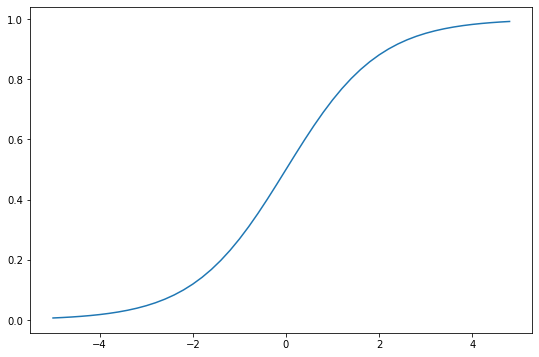

In [6]:
import math

def sigmoid(x):
    b = []
    for item in x:
        b.append(1/(1+math.exp(-item)))
    return b

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5., 5., 0.2)
sig = sigmoid(x)
plt.figure(figsize=(9,6))
plt.plot(x, sig)
plt.show()

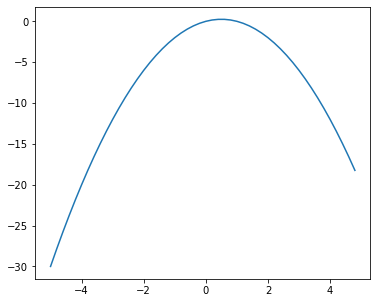

In [8]:
x = np.arange(-5., 5., 0.2)
sig = sigmoid_derivative(x)
plt.figure(figsize=(6,5))
plt.plot(x, sig)
plt.show()

In [69]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))

class Heart_disease:
    def __init__(self, x, y):
        self.IN      = x
        self.W1   = np.random.rand(self.IN.shape[1],6) 
        self.W2   = np.random.rand(6,4)  
        self.W3   = np.random.rand(4,1)
        self.y          = y
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.3
        
    def feed_forward(self):
        self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
        self.HIDDEN_LAYER_2 = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))
       # self.output = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))
        self.output = sigmoid(np.dot(self.HIDDEN_LAYER_2, self.W3))

    def back_propagate(self):
        # application of the chain rule to find derivative of the loss function with respect to W3, W2 and W1
        print(self.HIDDEN_LAYER_1.T)
        print(self.HIDDEN_LAYER_2.T)
        d_W3 = np.dot(self.HIDDEN_LAYER_2.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
        print(d_W3.shape)
        d_W2 = np.dot(self.HIDDEN_LAYER_1.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W3.T) * sigmoid_derivative(self.HIDDEN_LAYER_2)))
        print(d_W2.shape)
        d_W1 = np.dot(self.IN.T, np.dot((np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W3.T) * sigmoid_derivative(self.HIDDEN_LAYER_2)), self.W2.T) * sigmoid_derivative(self.HIDDEN_LAYER_1))
        print(d_W1.shape)
        # update the weights with the derivative (slope) of the loss function
        self.W1 += self.learning_rate*d_W1
        self.W2 += self.learning_rate*d_W2
        self.W3 += self.learning_rate*d_W3

    def train(self, epochs,learning_rate):
        self.learning_rate=learning_rate
        for i in range(epochs):
            self.feed_forward()
            self.back_propagate()
        print("Successfully Trained the Model")
        print("Weights 1:", self.W1)
        print("Weights 2:", self.W2)
        print("Weights 3:", self.W3)
    
    def print_output(self):
        print(self.output)

In [70]:
X = data.drop(["target"],axis=1)
y = data["target"]
y=np.array(y)
y= np.reshape(y, (-1,1)) 
epochs = 2
learning_rate = 0.5
ann = Heart_disease(X,y)
ann.train(epochs, learning_rate)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[0.98953839 0.98953839 0.98953839 ... 0.98953839 0.98953839 0.98953839]
 [0.97245501 0.97245501 0.97245501 ... 0.97245501 0.97245501 0.97245501]
 [0.91692376 0.91692376 0.91692376 ... 0.91692376 0.91692376 0.91692376]
 [0.96874695 0.96874695 0.96874695 ... 0.96874695 0.96874695 0.96874695]]
(4, 1)
(6, 4)
(13, 6)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[0.98837742 0.98837742 0.98837742 ... 0.98837742 0.98837742 0.98837742]
 [0.96442018 0.96442018 0.96442018 ... 0.96442018 0.96442018 0.96442018]
 [0.19789126 0.19789126 0.19789126 ... 0.19789126 0.19789126 0.19789126]
 [0.95843159 0.95843159 0.95843159 ... 0.95843159 0.95843159 0.95843159]]
(4, 1)
(6, 4)
(13, 6)
Successfully Trained the Model
Weights 1: [[0.50835612 0.41283652 0.

In [71]:
ann.feed_forward()

In [72]:
ann.output

array([[1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
       [1.07228994e-15],
